In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp, date_range
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
url='https://raw.githubusercontent.com/QuantLet/MVA/master/QID-1226-MVAportfol/apple.csv'
df=pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2009-12-01,202.24,213.95,188.68,210.73,19068700,210.73
1,2009-11-02,189.80,208.00,185.57,199.91,15856500,199.91
2,2009-10-01,185.35,208.71,180.70,188.50,22197500,188.50
3,2009-09-01,167.99,188.90,164.11,185.35,17906300,185.35
4,2009-08-03,165.21,172.49,159.42,168.21,14415700,168.21


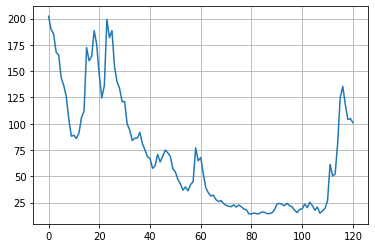

In [3]:
df['Open'].plot(grid=True)

In [4]:
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2009-12-01,202.24,213.95,188.68,210.73,19068700,210.73
2009-11-02,189.80,208.00,185.57,199.91,15856500,199.91
2009-10-01,185.35,208.71,180.70,188.50,22197500,188.50
2009-09-01,167.99,188.90,164.11,185.35,17906300,185.35
2009-08-03,165.21,172.49,159.42,168.21,14415700,168.21


<Figure size 720x720 with 0 Axes>

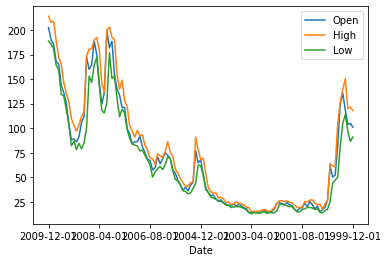

In [9]:
plt.figure(figsize=(10,10))
df[['Open', 'High', 'Low']].plot()
plt.show()

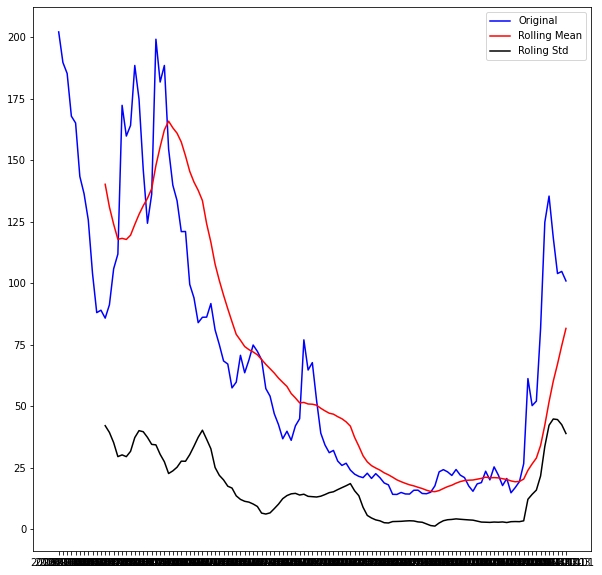

In [12]:
rolling_mean=df['Open'].rolling(window=12).mean()
rolling_std=df['Open'].rolling(window=12).std()

plt.figure(figsize=(10,10))
plt.plot(df['Open'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Roling Std')
plt.legend(loc='best')
plt.show()

In [14]:
df.count()

Open         121
High         121
Low          121
Close        121
Volume       121
Adj Close    121
dtype: int64

AS we can see that the roling mean and std are in increasing mode. Hence time series is not stsionary

# Use adfuller 


In [15]:
result=adfuller(df['Open'])
print('ADF Statisctic; {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print("critical vaale")
for key, value in result[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statisctic; -2.436740168964834
p-value: 0.13163407500053131
critical vaale
	1%: -3.486055829282407
	5%: -2.8859430324074076
	10%: -2.5797850694444446


As p-vale is > than 0.05. Hence the time series is not stationary


# taking log on the variable

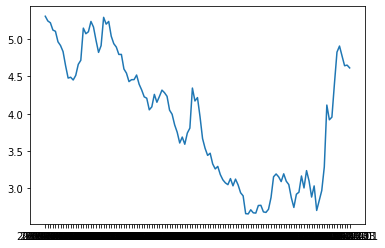

In [16]:
df_log=np.log(df['Open'])
plt.plot(df_log)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 2009-12-01 to 1999-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       121 non-null    float64
 1   High       121 non-null    float64
 2   Low        121 non-null    float64
 3   Close      121 non-null    float64
 4   Volume     121 non-null    int64  
 5   Adj Close  121 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 11.6+ KB


In [19]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2009-12-01,202.24,213.95,188.68,210.73,19068700,210.73
2009-11-02,189.80,208.00,185.57,199.91,15856500,199.91
2009-10-01,185.35,208.71,180.70,188.50,22197500,188.50
2009-09-01,167.99,188.90,164.11,185.35,17906300,185.35
2009-08-03,165.21,172.49,159.42,168.21,14415700,168.21


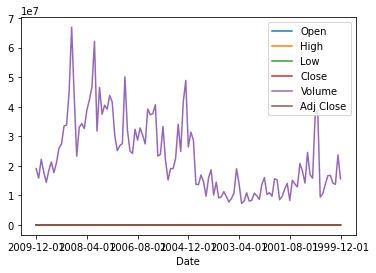

In [20]:
df.plot()

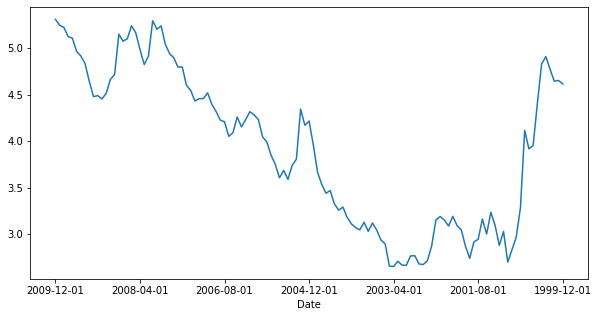

In [24]:
plt.figure(figsize=(10,5))
df_log.plot()

In [27]:
def get_stationry(timeseries):
  #rolling ststisc
  roling_mean=timeseries.rolling(window=12).mean()
  rolling_std=timeseries.rolling(window=12).std()

  #roling statistic plotting
  plt.figure(figsize=(10,10))
  original=plt.plot(timeseries, color='red', label='Original')
  mean=plt.plot(rolling_mean, color='blue', label='Rolling Mean')
  std=plt.plot(rolling_std, color='black', label='Rolling Std')
  plt.title("Rollig Mean & Std")
  plt.legend(loc='best')
  plt.show(block=False)

  #Dickey-Fuller-Test
  result=adfuller(timeseries)
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  print("critical value")
  for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

  
   

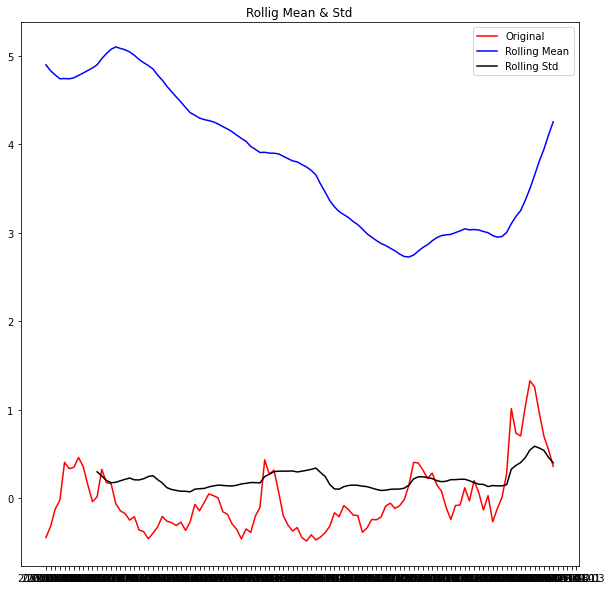

ADF Statistic: -3.0009307611087555
p-value: 0.03480757027636647
critical value
	1%: -3.492995948509562
	5%: -2.888954648057252
	10%: -2.58139291903223


In [28]:
rolling_mean=df_log.rolling(window=12).mean()
df_log_minus_mean=df_log-rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationry(df_log_minus_mean)

# p-value < 0.05
AS we can see that the p-value is < 0.05 .Now the timeseries is made stationry 

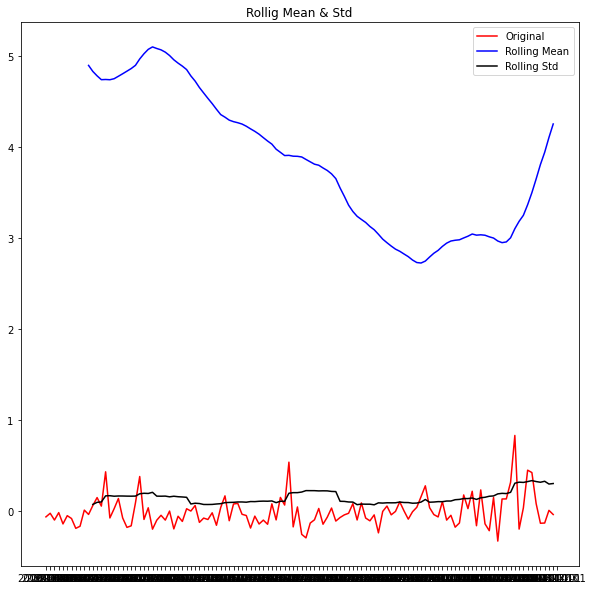

ADF Statistic: -9.447523935176381
p-value: 4.711693241051048e-16
critical value
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [29]:
df_log_shift=df_log-df_log.shift()
df_log_shift.dropna(inplace=True)

get_stationry(df_log_shift)

In this case p-value is much more smaller than the expected 
Here p-value is much more smaller than 0.05.
Finally we madw the time seires stationary . Our work is done. Now we need to look for the future prediction.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


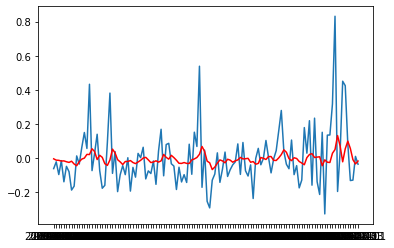

In [32]:
#decomposition=seasonal_decompose(df_log)
model=ARIMA(df_log, order=(2,1,0))
result=model.fit(disp=1)
plt.plot(df_log_shift)
plt.plot(result.fittedvalues, color='red')


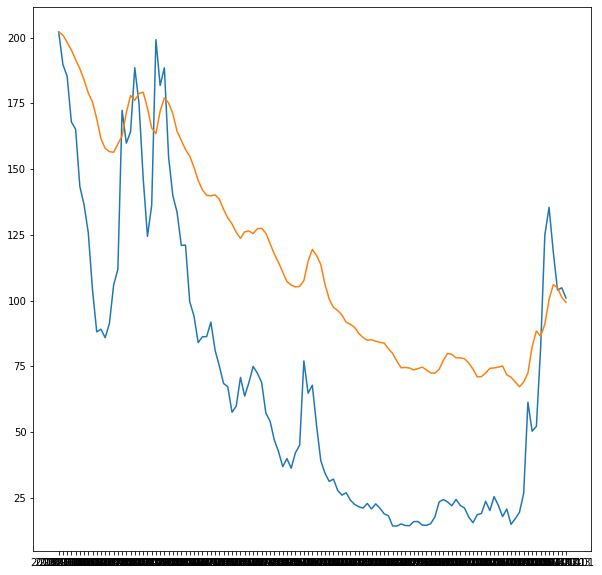

In [35]:
predictions_ARIMA_diff=pd.Series(result.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log=pd.Series(df_log.iloc[0], index=df_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA=np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,10))
plt.plot(df['Open'])
plt.plot(prediction_ARIMA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


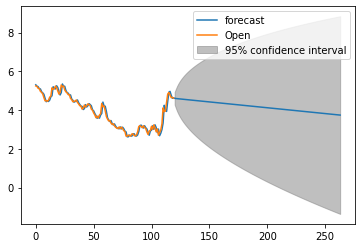

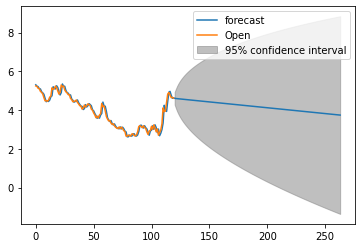

In [36]:
result.plot_predict(1,264)